# Machine Learning lerning 
###### by Jędrzej Kopiszka during Coronavirus School Break 03.2020
### 1st part is about Data Visualisation with Matplotlib.pyplot and Seaborn
### 2nd part is about Pandas 
### 3rd part is about Advanced Techniques of ML
### 4th part is MODEL EVALUATION - measuring performence of model

### Uniwersalny workflow w projektach ML:

    1. Definiowanie problemu
        -czym będą dane wejściowe i co chcemy przeiwdywać, czy mamy dostęp do danych odpowiednich do probleum
        -
        
    2. Wymiary sukcesu modelu
        -od tego co chcemy przewidzieć będą zaleźeć metryki, które stosujemy do mierzenia dokładności
        -np. tabela dokładności tp/tn/fn/fp
        -matryca ROC - całka pod funkcją ROC
        -AUC - area under curve - całka pod wykresem - chcemy żeby ta wartość była większ niż 0.5
        
    3. Techniki walidacji
    4. Przygotowanie danych 
    5. Bias Variance Trade off - redukcja MSE przy regresji
    6. 
    

In [1]:
# importing needed packages
import pandas as pd
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("setup complete")

setup complete


In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
fifa_path=r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\fifa.csv' # r before path needed in Jupyter
fifa_data = pd.read_csv(fifa_path, index_col='Date', parse_dates=True) #idex_col makes Date an Id of each row
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


Text(0.5, 1.0, 'Soccer World Cup Data')

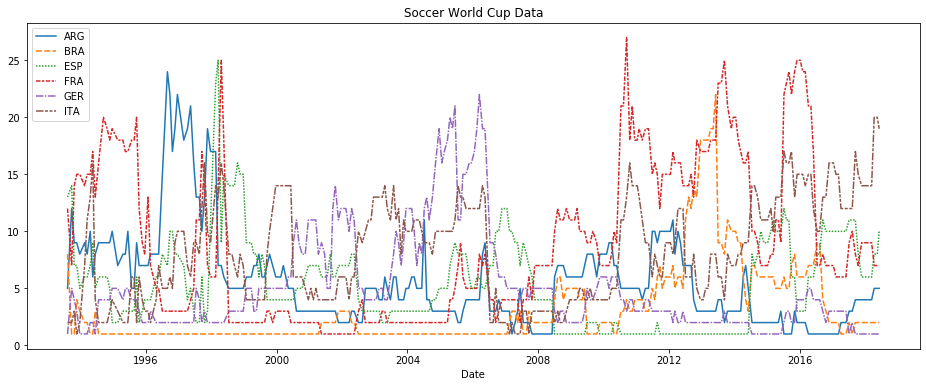

In [4]:
plt.figure(figsize=(16,6)) # asserting size to the plot
sns.lineplot(data=fifa_data) # creating lineplot using seaborn
plt.title('Soccer World Cup Data')

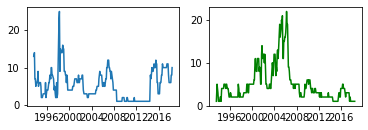

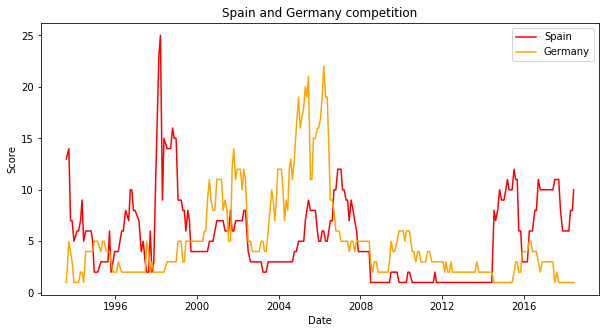

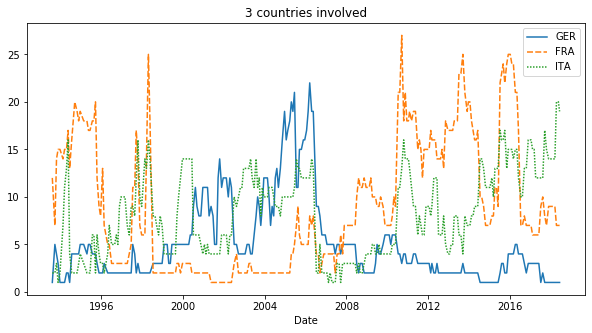

In [5]:
plt.subplot2grid((2,2),(0,0))
sns.lineplot(data=fifa_data['ESP'])

plt.subplot2grid((2,2), (0,1))
sns.lineplot(data=fifa_data['GER'], color='green')


plt.figure(figsize=(10,5))
plt.title('Spain and Germany competition')
plt.xlabel('Date')
plt.ylabel('Score')
sns.lineplot(data=fifa_data['ESP'], color='red', label='Spain')
sns.lineplot(data=fifa_data['GER'], color='orange', label='Germany')


plt.figure(figsize=(10,5))
plt.title('3 countries involved')
list_of_iso=['GER', 'FRA', 'ITA']
sns.lineplot(data=fifa_data[list_of_iso])

### Next file - Museums

In [6]:
museums_path=r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\museum_visitors.csv'
museums_data = pd.read_csv(museums_path, index_col='Date', parse_dates=True)
museums_data.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


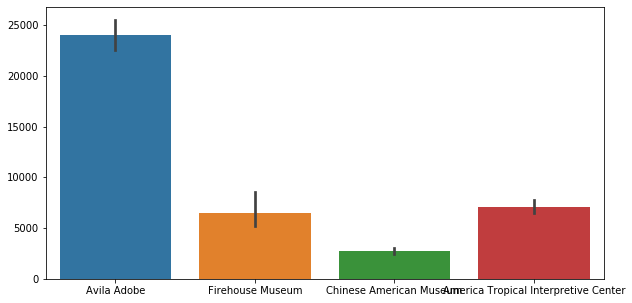

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=museums_data)

### Next file - Months


In [8]:
games_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\ign_scores.csv'
games_file=pd.read_csv(games_path, index_col='Platform' )
games_file.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


Text(0.5, 1.0, 'Horizontal Barplot of games')

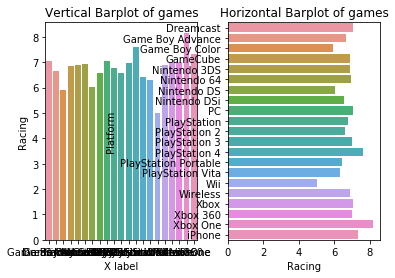

In [9]:
plt.subplot2grid((1,2),(0,0))
sns.barplot(x=games_file.index, y=games_file['Racing'])
plt.title('Vertical Barplot of games')
plt.xlabel('X label')

plt.subplot2grid((1,2), (0,1))
sns.barplot(x=games_file['Racing'], y=games_file.index) #change of x and y axis generates different plots
plt.title('Horizontal Barplot of games')


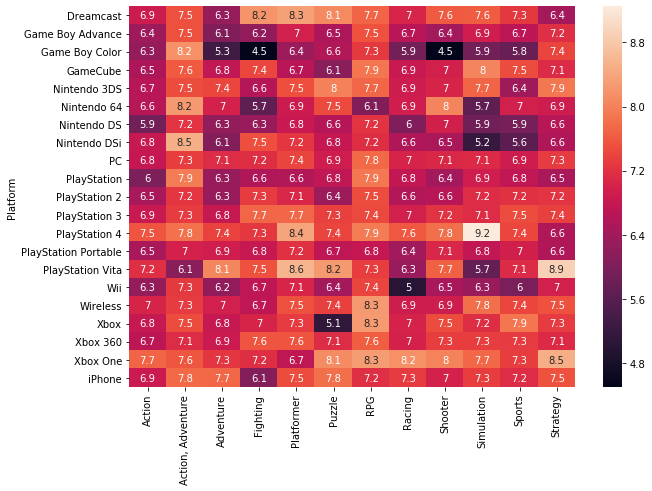

In [10]:
plt.figure(figsize = (10,7))
sns.heatmap(games_file, annot=True) #annot gives numbers inside each cell

### Scatter plots

In [11]:
insurance_path =r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\insurance.csv'
insurance_file = pd.read_csv(insurance_path)
print('Shape of Data Frame (rows, col)', insurance_file.shape)
insurance_file.head()

Shape of Data Frame (rows, col) (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


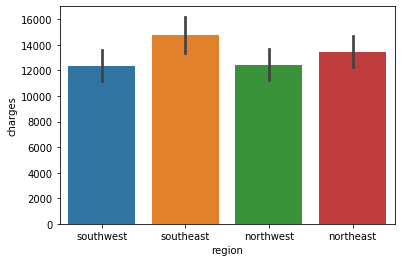

In [12]:
sns.barplot(x = insurance_file['region'], y = insurance_file['charges'])

In [13]:
candy_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\candy.csv'
candy_file = pd.read_csv(candy_path, index_col='id')
print(candy_file.shape)
print(list(candy_file.columns))
candy_file.head()

(83, 13)
['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


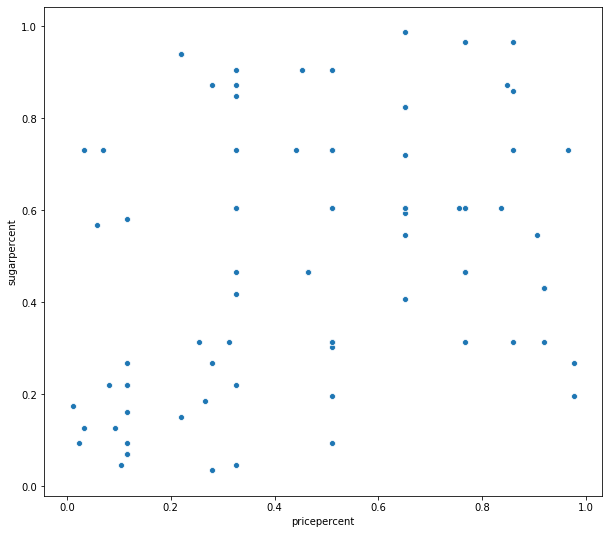

In [14]:
plt.figure(figsize=(10,9))
sns.scatterplot(y=candy_file['sugarpercent'], x=candy_file['pricepercent'])

In [15]:
sns.heatmap(x=candy_file['pricepercent'], y=candy_file['sugarpercent'])

TypeError: heatmap() missing 1 required positional argument: 'data'

In [ ]:
plt.subplot2grid((1,3), (0,0))
sns.regplot(x=candy_file['sugarpercent'], y=candy_file['winpercent'])

plt.subplot2grid((1,3), (0,1))
sns.scatterplot(x=candy_file['sugarpercent'], y=candy_file['winpercent'], hue=candy_file['chocolate'])

plt.subplot2grid((1,3), (0,2))
sns.lmplot(x='sugarpercent', y='winpercent', hue='chocolate', data=candy_file)


In [ ]:
sns.boxplot(x=candy_file['winpercent'], y=candy_file['chocolate'])

In [ ]:
plt.subplot2grid((1,2), (0,0))
sns.scatterplot(x=candy_file['chocolate'], y=candy_file['winpercent'])

plt.subplot2grid((1,2), (0,1))
sns.swarmplot(x=candy_file['chocolate'], y=candy_file['winpercent'])

In [ ]:
iris_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\iris.csv'
iris_data = pd.read_csv(iris_path, index_col='Id')
iris_data.shape #number of rows and columns 
iris_data.size #number of cells (rows*columns)
iris_data.columns

In [ ]:
plt.subplot2grid((2,2),(0,0))
sns.swarmplot(x=iris_data['Species'], y=iris_data['Petal Length (cm)'])

plt.subplot2grid((2,2), (0,1))
sns.swarmplot(x=iris_data['Species'], y=iris_data['Petal Width (cm)'])

plt.subplot2grid((2,2), (1,0))
sns.swarmplot(x=iris_data['Species'], y=iris_data['Sepal Length (cm)'])

plt.subplot2grid((2,2), (1,1))
sns.swarmplot(x=iris_data['Species'], y=iris_data['Sepal Width (cm)'])

In [ ]:
sns.barplot(x=iris_data['Species'], y=iris_data['Sepal Width (cm)'])

In [ ]:
iris_data.groupby(['Species']).mean()

In [ ]:
#histogram
plt.subplot2grid((1,3), (0,0))
sns.distplot(a=iris_data['Sepal Width (cm)'], kde=False)
plt.ylabel('Quantity')

plt.subplot2grid((1,3), (0,1))
sns.barplot(y=iris_data['Sepal Width (cm)'], x=iris_data.index)
plt.xlabel("Id")
plt.ylabel('Cm')

plt.subplot2grid((1,3), (0,2))
sns.lineplot(data=iris_data['Sepal Width (cm)'])
plt.xlabel('Id')
plt.ylabel('Cm')
plt.title('Why not to use line graph for ID ')
plt.legend('False data')

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(a=iris_data['Sepal Width (cm)'], kde=True) #ked is on, showing trend

#### KDEplot shows kernel density - to samo co histogram, tylko smooth line

In [ ]:
sns.kdeplot(data=iris_data['Sepal Width (cm)'], shade=True) #shade gives fullfilment below line

In [ ]:
sns.swarmplot(y=iris_data['Sepal Width (cm)'], x=iris_data['Petal Length (cm)'])

In [ ]:
sns.jointplot(x=iris_data['Sepal Width (cm)'], y=iris_data['Petal Length (cm)'], kind='kde')

In [ ]:
sns.swarmplot(x=iris_data['Sepal Width (cm)'], y=iris_data['Petal Length (cm)'])

In [ ]:
sns.distplot(a=iris_data['Petal Width (cm)'], kde=True, label ='Petal Width (cm)')
sns.distplot(a=iris_data['Sepal Width (cm)'], kde=True, label = 'Sepal Width (cm)') #kde = None meaning no smooth trend line
plt.legend() #displays a legend declared in distplot as label

In [ ]:
#sns.scatterplot(x=iris_data['Sepal Width (cm)'], y=iris_data['Sepal Width (cm)'])
sns.swarmplot(x=iris_data['Sepal Width (cm)'], y=iris_data['Sepal Width (cm)'])

In [ ]:
plt.subplot2grid((1,2), (0,0))
sns.lineplot(data=iris_data['Sepal Width (cm)'])
sns.set_style('whitegrid') #setting grid of plot: darkgrid/whitegrid

plt.subplot2grid((1,2), (0,1))
sns.set_style('dark') #setting style of plot - theme: dark/white/ticks
sns.swarmplot(x=iris_data['Petal Width (cm)'], y=iris_data['Sepal Width (cm)'])

# Pandas 

In [ ]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]}) #Yes, NO are column names

In [ ]:
pd.DataFrame({'First column':[1,2], 'Second column':[3,4]}, index=['First_row', 'Second_row']) #declaring index name


A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [ ]:
pd.Series([1,2,3,4,5])

In [ ]:
pd.Series([1,2,3,4,5], index=['Row1', 'Row2', 'Row3', 'Row4', 'Row5'], name='Series number 1')

In [ ]:
zasoby = pd.DataFrame({'Marek':[10,20,30], 'Gosia':[14,43,12], 'Wanda':[532,32,1]}, index=['Konto', 'Gotówka', 'Samochody'])
print(zasoby)

In [ ]:
print(zasoby.Marek) # accesing column in DataFrame

print('\n')
print(zasoby['Marek'])


In [ ]:
zasoby.Marek.sum() #sum of all values in colum Marek

In [ ]:
zasoby.Marek.Konto #accesing specific column and row ([Marek][Konto])

In [ ]:
print(zasoby.loc['Konto']) #accesing row by name

print('\n')
print(zasoby.iloc[0]) #accesing row by index

In [ ]:
print(zasoby.loc['Konto', 'Marek']) #accesing row and column (in order row, colum)


print('\n')
print(zasoby.iloc[:,2]) #accesing range of rows and range of columns


print('\n')
print(zasoby.loc[:, ['Marek', 'Wanda']])

Choosing between loc and iloc
When choosing or transitioning between loc and iloc, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. loc, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that loc can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index df.loc['Apples':'Potatoes'] than it is to index something like df.loc['Apples', 'Potatoet] (t coming after s in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.loc[0:999].

Otherwise, the semantics of using loc are the same as those for iloc.

In [ ]:
ramka = pd.DataFrame({ 'Country':['Ger', 'Rus', 'Arg'],'Win':[2,4,1], 'Lost':[4,3,2]})
ramka = ramka.set_index('Country') #setting an index 
print(ramka) 

print('\n', ramka>2)



In [ ]:
ramka2 = ramka.loc[(ramka.Win>1) & (ramka.Lost<4)] #printing only data which passed if statement
print(ramka2) 

In [ ]:
ramka.loc[ramka.Win.isin([1,2])] #data that fits into criteria in list []

In [ ]:
ramka.loc[ramka.Win.notnull()] #data that has no NaN objects 

In [ ]:
ramka['Champions']='Not' #appending DF with additional columns
ramka

In [ ]:
ramka.Lost.mean() #mean value of column Lost
ramka.Win.median() # median od Win column

In [ ]:
ramka.Lost.unique() #unique values in Lost column

In [ ]:
ramka.Lost.value_counts() #counting apperience of each element of Lost in Lost columns

In [ ]:
centered_ramka = ramka.Lost - ramka.Lost.mean() #centering - subtracting mean from imported value
centered_ramka

In [ ]:
#finding index 
best_ratio = (ramka.Win/ramka.Lost).idxmax() #index of row where ratio is the best
ramka.loc[best_ratio] #printing that row

#### Pandas yt tutorials - shown on Titanic data set

In [ ]:
titanic_train_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\train.csv'
titanic_test_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\test.csv'

titanic_train = pd.read_csv(titanic_train_path, index_col='PassengerId')
titanic_test = pd.read_csv(titanic_test_path, index_col='PassengerId')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
titanic_train.describe() #description of data 

In [ ]:
titanic_train.info() #more info on data

In [ ]:
titanic_train.isnull().sum() #how many NaN values in data

In [ ]:
titanic_train[titanic_train.Embarked.isnull()] #rows that fullfil the condition: NaN in Embarked column

In [ ]:
a = titanic_train[['Survived', 'Sex', 'Parch', 'Age']].tail()
a = pd.get_dummies(a) #changing Sex from male/female to 0/1
a = a.dropna(how='any') #remove rows in which any of the value is a NaN, we can use how=any/all
a.isnull().sum()

In [ ]:
b = titanic_train[['Survived', 'Sex', 'Parch', 'Age']]
b.Sex.value_counts() #how many male and females

In [ ]:
b.Age.fillna(value=int(b.Age.mean()), inplace=True) #exchanging NaN values in Age with int(mean of Age)
b.tail()

In [ ]:
print(titanic_train.groupby(['Sex']).mean()) #full tabel of mean values grouped by sex
print(titanic_train.groupby(['Sex']).mean().iloc[:,:2]) # only first 2 columns shown with its mean values
print(titanic_train.groupby(['Sex']).mean().loc[:, ['Age']]) #specific column by name

In [ ]:
test_df = pd.DataFrame({'name': [np.nan, 'Ivanka','Sylvia','Weronica'], 
                        'surname':[np.nan, 'Trump', np.nan,'Kardashian'], 
                        'Age':[np.nan, np.nan, np.nan, 23], 
                        'Job':[np.nan, 'FLOTUS', 'Worker','Celeb'], 
                        'Sex':[np.nan, 'Female', 'Female','Female']})
test_df

In [ ]:
test_df = test_df.dropna(how='all') #removing whole NaN row
test_df.dropna() #removing all rows where NaN occured
test_df.dropna(how='all', axis=1) #removing column with only NaN values

In [ ]:
ld = titanic_train.Survived.value_counts() #Series of index:1/0 and value od 1/0 passengers
sns.barplot(x=ld.index, y=ld.values) #plotting dead and alive 

In [ ]:
features = ['Pclass', 'Sex', 'SibSp']

X_train = pd.get_dummies(titanic_train[features])
x_test = pd.get_dummies(titanic_test[features])

Y_train = titanic_train['Survived']


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
prediction = model.predict(x_test)
    


## Advanced ML

Import bibliotek, problem to na podstawie narysowanych odręcznie liczb przekształcić je na cyfrowe odpowiedniki

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #train test split for data
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits  # data set that we use, hand-written numbers

digits = load_digits() # digits is the data we have
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html - descripion
# of the data

In [ ]:
type(digits) #not a df, rather a dictionary

In [ ]:
digits

In [ ]:
digits['DESCR'] #description of the data

In [ ]:
digits.keys() 

In [ ]:
for i in digits:
    print(i,digits[i],'\n')

In [ ]:
digits.target #the way we access every value for defined key

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
#splitting data

#### Logistic Regression
We are using Logistic Regression model and measuring it's prediction using score method. 
Score uses r^2 statistics to measure the fit

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)  # R^2 statistics 0(min)-1(max)

#### Support Vector Classifier

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

#### Random Forest Classifier

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

In [ ]:
#creating empyt list for estimator and score storage
scores=[] 
estimators=[]
#running model with different n_estimators values
for estimator in range(2,200,30):
    rf_model=RandomForestClassifier(n_estimators=estimator)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_test, y_test)
    scores.append(score)
    estimators.append(estimator)
print('end of estimation')

# transforming two list to DF
r2_scores_df = pd.DataFrame({'Estimator':estimators, 'Score':scores})
r2_scores_df = r2_scores_df.set_index('Estimator')
print(r2_scores_df)

#plotting scores
sns.lineplot(data=r2_scores_df)
plt.xlabel('N_estimators value')
plt.ylabel('Score r^2, log transformed')
plt.yscale(value='log')

We can build a function to predict with less code

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

### Cross Validation
####  Stratified k fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
folds

#### K fold

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]): # example of data divided to 3 pieces
    print(train_index, test_index)

In [ ]:
score_lr=[]
score_svc=[]
score_rf=[]

for train_index, test_index in folds.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]  
    
    score_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    score_svc.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    
print('Scores for different models: \n score for LogisticReg', score_lr, '\n score for RandomForest', score_rf, '\n score for SVC', score_svc)

#### Different way of measuring, less steps to do the same

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(), digits.data, digits.target, cv=5) #return numpy ndarry with 5 scores (5 fold)

In [ ]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

In [ ]:
cross_val_score(SVC(), digits.data, digits.target)

## MODEL EVALUATION - how to measure it the model is good?

### Accuracy  - model.score for classification problems
Model score is not enought cause if we dont know the data, we cannot say is the 90% accuracy a good score or not

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) 

### Confusion Matrix
That is not a metrix, helps us give the type of errors model makes, helps to understand other metrics

Matrix i a table:
       Predicted 0 Predicted 1
true 0
true 1

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
#Creating sample data randomly
from sklearn.datasets import make_classification #data set for creating samples

X,y = make_classification(n_samples=10000, n_classes=2, weights=[0.95, 0.05], random_state=42) 
# 10000 samples, bianry classes, 0.95 class =1, 0.05 class 0, random_state=42 makes the same data every time you run cell

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.2, random_state=42)

print('data prepared')

In [ ]:
#Confusion matrix
model = DummyClassifier() #Dummy Classifier assignes class that has superiority in data (95% of samples is 1, it will assign 1 to all predictions)
model.fit(X_train_sample, y_train_sample)

confusion_matrix(y_test_sample, model.predict(X_test_sample))

#####  metrics we get from confusion matrix:

In [ ]:
print('Precision score: ', precision_score(y_test_sample, model.predict(X_test_sample)))
print('recall score: ', recall_score(y_test_sample, model.predict(X_test_sample)))
print('F1 score: ', f1_score(y_test_sample, model.predict(X_test_sample)))

Precision is true positives/(true positives + false positives) ->works on column

Recall    is true positives/(true positives + False negatives) -> works on row

F1 score  is an Harmonic Mean of Recall and Precision

How to evaluate model:
    what is better for us - more Recall or more Precision? That depands on the problem

  ##### Model complexity graph
  we use cross validtion, divided to 3 groups: Train, Make decsions set (cross validation allows that), Test set
  We plot model complexity graph using training and Make decisions set. We make a decision based on make decision set, and when we are done - we predict data on test set - that is a final step

#### Choosing best model based on metods shown above:
   - Split data using Cross validation to 3 subsets: Train, Cross Valid, Test
   - Run few different models (different parameters np. different degrees of polinomials)
   - For each model, calculate a F1 score using Crossvalidation subset
   - Pick the model with highest F1 score

#### IF you use models with more than one parameter:
   - you do it using e.i. 
                           for i in range(4):
                               for j in range(6): 
                                   compute F1 score
                                   if current F1 score is the biggest F1 score so far:
                                         the biggest f1 score = current F1 score
   - Use test subset for final check

### Example of Classification problem

In [ ]:
pima_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\pima-indians-diabetes-database\diabetes.csv'
pima_data = pd.read_csv(pima_path)

In [ ]:
pima_data.head()

In [ ]:
print(pima_data.shape)
pima_data.info()

In [ ]:
pima_data.isnull().sum()

In [ ]:
list(pima_data.columns)

In [ ]:
pima_data.describe()

In [ ]:
plt.subplot2grid((2,2), (0,0))
sns.swarmplot(x=pima_data.Age, y=pima_data.Pregnancies)

plt.subplot2grid((2,2), (0,1))
sns.swarmplot(x=pima_data.Age, y=pima_data.Insulin)

plt.subplot2grid((2,2), (1,0))
sns.lmplot(x='BloodPressure', y='Insulin', data=pima_data, hue='Outcome')

plt.subplot2grid((2,2), (1,1))
sns.regplot(x=pima_data.Pregnancies, y=pima_data.Glucose)

In [ ]:
pima_insuline_centered = pima_data.Insulin - pima_data.Insulin.mean() #centering
pima_insuline_centered.head()

In [ ]:
pima_data.iloc[8, :] #8 row, all columns

In [ ]:
pima_shorten = pima_data.loc[:, ['Insulin', 'Glucose', 'BMI', 'Age']]
pima_shorten.head()

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=20), pima_shorten, pima_data.Outcome)

In [ ]:
cross_val_score(LogisticRegression(), pima_shorten, pima_data.Outcome)

In [ ]:
X = pima_shorten
y = pima_data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model_rf=RandomForestClassifier(n_estimators=20)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

In [ ]:
prediction_lr = model_lr.predict(X_test)
prediction_lr[:10] #numpy array of predicted values in order of indexing

In [ ]:
model_lr.predict_proba(X_test)[:10] #probability of each class in each example of X_test

#### NULL accuracy: accuracy that could be achived by predicting the most frequent class

In [ ]:
y_test.value_counts() #most freq class

In [ ]:
y_test.mean() # % of how many 1 in data, works only for binary classes

In [ ]:
1-y_test.mean() #DummyClassfier score is the result, showing the 74%accuracy of our sophisticated model is very low

#### Confusion Matrix

In [ ]:
confusion = confusion_matrix(y_test, prediction_lr) #Confusion matrix
confusion

In [ ]:
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]

#### Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, prediction_lr) # TP/float(TP + FN)

#### Specificity

In [ ]:
TN / float(TN + FP)

### Cross-validation feature selection on Numerical values 

In [ ]:
adverts_path=r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\advertising-dataset\advertising.csv'

adverts_data = pd.read_csv(adverts_path)

In [ ]:
adverts_data.head()

In [ ]:
adverts_data.describe()

In [ ]:
adverts_data.isnull().sum() 

In [ ]:
adverts_data.info()

In [ ]:
plt.subplot2grid((2,2), (0,0))
sns.scatterplot(x=adverts_data.Sales, y=adverts_data.TV)

plt.subplot2grid((2,2), (0,1))
sns.scatterplot(x=adverts_data.Sales, y=adverts_data.Newspaper)

plt.subplot2grid((2,2), (1,0))
sns.scatterplot(x=adverts_data.Sales, y=adverts_data.Radio)

In [ ]:
plt.subplot2grid((2,2),(0,0))
sns.scatterplot(x=adverts_data.Radio, y=adverts_data.Newspaper)

plt.subplot2grid((2,2), (0,1))
sns.scatterplot(x=adverts_data.Radio, y=adverts_data.TV)

plt.subplot2grid((2,2), (1,0))
sns.scatterplot(x=adverts_data.Newspaper, y=adverts_data.TV)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_r = LinearRegression()
features_adv = ['TV', 'Radio', 'Newspaper']
neg_mse = cross_val_score(linear_r, adverts_data[features_adv], adverts_data.Sales, scoring='neg_mean_squared_error', cv=10)
#scoring = 'neg_mean_squared_error' , cv=10 (10-fold CV) 

neg_mse

In [ ]:
mse = -neg_mse  # egation of negative mse
print(np.sqrt(mse))  # sqrt of mse
np.sqrt(mse).mean()  # mean of square root of mse